<a href="https://colab.research.google.com/github/edllyn/unicornStartups/blob/main/Unicorn_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Ler os dados
baseDados = pd.read_csv('/content/Unicorns in June 2022s end - june 2022.csv')

#Verificar Dimensão
baseDados.shape

(1170, 7)

In [3]:
# Primeiros registros
baseDados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
#Renomear
baseDados.rename( columns = {
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Investors': 'Investidores',
}, inplace = True    
)

In [5]:
# Verificar tipo da informação
baseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1170 non-null   object
 1   Valor($)        1170 non-null   object
 2   Data de Adesão  1170 non-null   object
 3   Pais            1170 non-null   object
 4   City            1170 non-null   object
 5   Setor           1170 non-null   object
 6   Investidores    1152 non-null   object
dtypes: object(7)
memory usage: 64.1+ KB


In [6]:
#Campos nulos
baseDados.isnull().sum()

Empresa            0
Valor($)           0
Data de Adesão     0
Pais               0
City               0
Setor              0
Investidores      18
dtype: int64

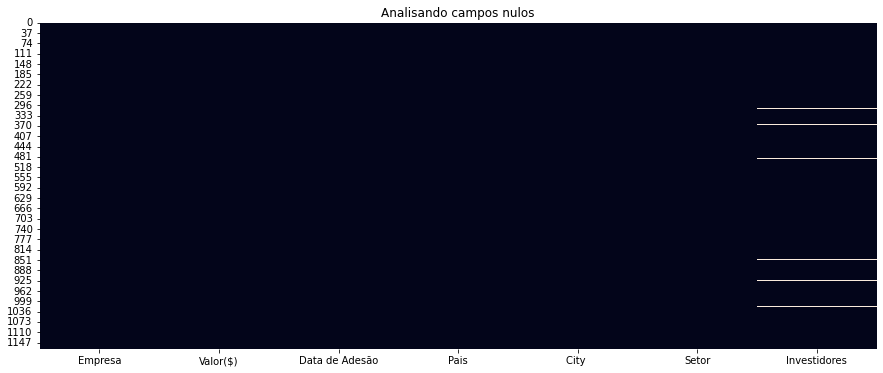

In [7]:
# Grafico
plt.figure(figsize=(15,6))
plt.title('Analisando campos nulos')
sns.heatmap(baseDados.isnull(), cbar=False);

In [8]:
# Campos unicos
baseDados.nunique()

Empresa           1167
Valor($)           219
Data de Adesão     683
Pais                48
City               282
Setor               33
Investidores      1136
dtype: int64

In [9]:
# Valores unicos - Rank
baseDados['Setor'].value_counts()

Fintech                                                               236
Internet software & services                                          221
E-commerce & direct-to-consumer                                       105
Health                                                                 90
Artificial intelligence                                                74
Other                                                                  65
Supply chain, logistics, & delivery                                    62
Cybersecurity                                                          58
Data management & analytics                                            44
Auto & transportation                                                  39
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 31
Consumer & retail                     

In [10]:
# Valores unicos - Rank
baseDados['Setor'].value_counts(normalize=True)

Fintech                                                               0.201709
Internet software & services                                          0.188889
E-commerce & direct-to-consumer                                       0.089744
Health                                                                0.076923
Artificial intelligence                                               0.063248
Other                                                                 0.055556
Supply chain, logistics, & delivery                                   0.052991
Cybersecurity                                                         0.049573
Data management & analytics                                           0.037607
Auto & transportation                                                 0.033333
Hardware                                                              0.032479
Mobile & telecommunications                                           0.031624
Edtech                                              

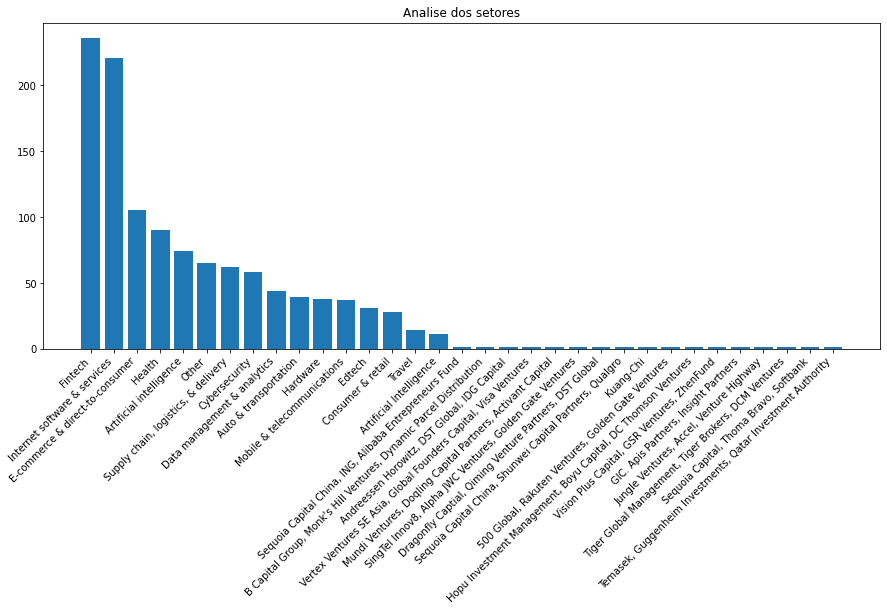

In [11]:
plt.figure(figsize=(15,6))
plt.title('Analise dos setores')
plt.bar(baseDados['Setor'].value_counts().index, baseDados['Setor'].value_counts() )
plt.xticks(rotation=45, ha='right');

In [13]:
Analise = round(baseDados['Pais'].value_counts(normalize = True) * 100,1)
Analise

United States           53.7
China                   14.9
India                    5.8
United Kingdom           3.8
Germany                  2.5
France                   2.1
Israel                   1.8
Canada                   1.6
Brazil                   1.5
South Korea              1.3
Singapore                1.1
Australia                0.7
Sweden                   0.7
Hong Kong                0.6
Mexico                   0.6
Netherlands              0.6
Japan                    0.5
Ireland                  0.5
Switzerland              0.5
Indonesia                0.5
Norway                   0.4
Spain                    0.3
Finland                  0.3
Belgium                  0.3
Turkey                   0.3
United Arab Emirates     0.3
Colombia                 0.3
Denmark                  0.2
South Africa             0.2
Croatia                  0.2
Philippines              0.2
Chile                    0.2
Thailand                 0.2
Estonia                  0.2
Austria       

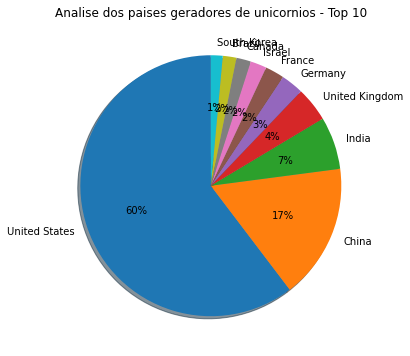

In [17]:
#Plot geral dos paises
plt.figure(figsize=(15,6))
plt.title('Analise dos paises geradores de unicornios - Top 10')
plt.pie(
        Analise.head(10),
        labels= Analise.index[0:10],
        shadow=True,
        startangle=90,
        autopct='%1.f%%',
);

In [18]:
#Conversão do campo
baseDados['Data de Adesão'] = pd.to_datetime(baseDados['Data de Adesão'])
baseDados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2011-12-12
Name: Data de Adesão, dtype: datetime64[ns]

In [19]:
#Extrair o Ano e mes
baseDados['Mes'] = pd.DatetimeIndex(baseDados['Data de Adesão']).month
baseDados['Ano'] = pd.DatetimeIndex(baseDados['Data de Adesão']).year
baseDados.head()

,Empresa,Valor($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Klarna,$45.60,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011


In [21]:
#Tabela Analitica
analiseAgrupada = baseDados.groupby(by=['Pais', 'Ano','Mes','Empresa']).count().reset_index()
analiseAgrupada.loc[
  analiseAgrupada['Pais'] == 'Brazil'  
]

,Pais,Ano,Mes,Empresa,Valor($),Data de Adesão,City,Setor,Investidores
16,Brazil,2018,7,Movile,1,1,1,1,1
17,Brazil,2018,11,iFood,1,1,1,1,1
18,Brazil,2019,6,Loggi,1,1,1,1,1
19,Brazil,2019,9,QuintoAndar,1,1,1,1,1
20,Brazil,2019,10,EBANX,1,1,1,1,1
21,Brazil,2019,12,Wildlife Studios,1,1,1,1,1
22,Brazil,2020,1,Loft,1,1,1,1,1
23,Brazil,2020,12,C6 Bank,1,1,1,1,1
24,Brazil,2020,12,Creditas,1,1,1,1,1
25,Brazil,2021,1,MadeiraMadeira,1,1,1,1,1


In [22]:
# Transformando a coluna valor
baseDados['Valor($)'] = pd.to_numeric( baseDados['Valor($)'].apply( lambda Linha: Linha.replace('$', '') ) )
baseDados.head()

,Empresa,Valor($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011


In [23]:
#Tabela Analitica
analisePais=baseDados.groupby(by=['Pais']).sum()['Valor($)'].reset_index()
analisePais.head()

,Pais,Valor($)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [24]:
analiseValor = analisePais.sort_values('Valor($)', ascending=False)
analiseValor.head()

,Pais,Valor($)
46,United States,2055.04
9,China,674.09
45,United Kingdom,202.75
20,India,198.22
18,Germany,77.38


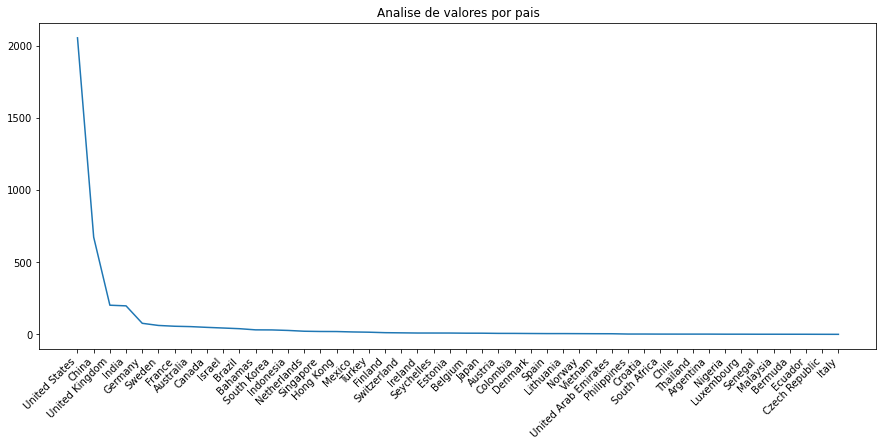

In [31]:
plt.figure(figsize=(15,6))
plt.plot(analiseValor['Pais'], analiseValor['Valor($)'])
plt.title('Analise de valores por pais')
plt.xticks(rotation = 45, ha='right');